# from_brute_to_beauty

#### 1. Brute Forcing the problem Set

A brute-force approach to this problem will iterate through the entire array of numbers `[nums]`given the function `def bruteforce_search_extension(nums, target):` to check for three different targets using a for-loop `for i in range(len(nums)):`:
1. The first occurrence of the target value [its index], which is executed by the lines `if start_index is None: start_index = i`.
2. The last occurrence of the target value [its index], defined by `end_index = i`.
3. The total count of occurrences of the target value [integer], which is updated every time the target is found using `count += 1`.

If the target value is not found, the function will return 'None'.
This is the most straightforward approach to use, but it is also the most inefficient one, especially for huge arrays where the function will have to iterate through every number in the array to check for the target values.
The entire code for this algorithm, as well as the test cases, can be found below.

In [1]:
def bruteforce_search_extension(nums, target):
    """
    Finds the start index, end index, and total count of the target in a sorted array.
    If the target is not found, returns None.

    Parameters:
    nums (list): Sorted array of postal codes (numbers).
    target (int): Target postal code to find.

    Returns:
    list or None: [start_index, end_index, count] if found, else None.
    """
    start_index = None #the initial value for the start index is None until the first target value is found
    end_index = None #end index will be updated continuously whenever the target is found
    count = 0 #no target values were found yet

    # Iterate through the entire array
    for i in range(len(nums)):
        if nums[i] == target:
            if start_index is None:
                start_index = i #if this is the first time the target is found, record its index as a start_index
            end_index = i #the index for this value will also be the end_index
            count += 1 #initiate the count for the number of target occurrences found and update it every time the target is found

    if count > 0:
        return [start_index, end_index, count] #if the count is greater than 1, the target was found, so we return the result consisting of the target's position(s) in the array and the number of its occurrences
    else:
        return None #otherwise, the target does not exist in the array

In [2]:
#Test cases:

#test case 1 (target can be found in the array multiple times)
nums1 = [1, 2, 2, 3, 4, 4, 4, 5, 5, 5, 5, 7]
target1 = 4
print(bruteforce_search_extension(nums1, target1))

#test case 2 (target is not in the array)
nums2 = [1, 2, 2, 3, 5, 5, 5, 5, 7]
target2 = 4
print(bruteforce_search_extension(nums2, target2))

#test case 3 (the array is empty)
nums3 = []
target3 = 4
print(bruteforce_search_extension(nums3, target3))

#test case 4 (target is found in the array once)
nums4 = [1, 2, 2, 3, 4, 5, 5, 5, 5, 7]
target4 = 4
print(bruteforce_search_extension(nums4, target4))

#test case 5 (the whole array consists of targets)
nums5 = [4, 4, 4, 4, 4]
target5 = 4
print(bruteforce_search_extension(nums5, target5))

[4, 6, 3]
None
None
[4, 4, 1]
[0, 4, 5]


#### 2. Improved algorithmic strategy - binary search. <be>
As mentioned earlier, the Brute-Force Algorithm is not the most efficient approach to this problem. Therefore, an improved algorithmic strategy that can be used to search for the target in an array would be Binary Search. This strategy, similar to the standard binary search, divides the array in half and only searches through the relevant half until it reaches the target. The more elaborated description on this mechanism can be seen in the code below.

Here is the link to [Loom Video](https://www.loom.com/share/43c458b8616b4f6bb3ab758afe59f884?sid=e81cde15-cd67-4d3c-b24b-de5a4dd630a0) explaining how this approach is used for the given Problem Set.

#### 3. Working on Python implementation of the binary search approach described in the video above.

##### Iterative approach
For this problem specifically, binary search will have to run twice: once to find the first occurrence of the target and then again to find the last occurrence.
For this, we use two functions: ` def find_first(nums, target):` and `def find_last(nums, target):` within the function `def iterative_binary_search_extension(nums, target):`. They operate within the while-loops `while left <= right:` and `while left <= right:` with the termination condition until the left pointer does not exceed the right pointer for the first occurrence and vise versa.

##### Recursive approach
Similarly to the iterative approach, a recursive function also consists of two helper functions: `def find_first_recursive(nums, target, left, right):` and `def find_last_recursive(nums, target, left, right):`, which let the function call itself on smaller portions of the list. It would start by checking the middle element, and if it is not the target, it makes the recursive calls to the relevant parts of the array after the comparison until `left > right` or until the last occurrence is found.

The full code for implementation of this algorithm, as well as the test cases, can be found below.

In [ ]:
#Iterative Approach

def iterative_binary_search_extension(nums, target):
    '''
    This function uses an iterative binary search to find the first and last occurrence
    of the target value in a sorted list. It returns a list containing the indices
    of the first and last occurrences, along with the total count of the target.
    If the target is not found, it returns None.

    Parameters:
    nums (list): A sorted list of integers.
    target (int): The target value to search for.

    Returns:
    list or None: [first_index, last_index, count] if target is found, otherwise None.
    '''
    def find_first(nums, target): #create a function that searches for the index of the first occurrence of the target
        left, right = 0, len(nums) - 1
        first = -1
        while left <= right:
            mid = (left + right) // 2
            if nums[mid] == target:
                first = mid
                right = mid - 1   #move to the left side of the middle to search for the first occurrence
            elif nums[mid] < target:
                left = mid + 1
            else:
                right = mid - 1
        return first

    def find_last(nums, target): #create a function that searches for the index of the last occurrence of the target
        left, right = 0, len(nums) - 1
        last = -1
        while left <= right:
            mid = (left + right) // 2
            if nums[mid] == target:
                last = mid
                left = mid + 1  #move to the right side of the middle to search for the last occurrence
            elif nums[mid] < target:
                left = mid + 1
            else:
                right = mid - 1
        return last

    first = find_first(nums, target)
    if first == -1:  #if the first occurrence is not found
        return None

    last = find_last(nums, target)
    if last == -1:  #if the last occurrence is not found
        return None

    #calculate the target count
    count = last - first + 1
    return [first, last, count]

In [ ]:
#Recursive Approach

def recursive_binary_search_extension(nums, target):
    '''
    This function uses a recursive binary search to find the first and last occurrence
    of the target value in a sorted list. It returns a list containing the indices
    of the first and last occurrences, along with the total count of the target.
    If the target is not found, it returns None.

    Parameters:
    nums (list): A sorted list of integers.
    target (int): The target value to search for.

    Returns:
    list or None: [first_index, last_index, count] if target is found, otherwise None.
    '''
    def find_first_recursive(nums, target, left, right): #create a function that searches for the index of the first occurrence of the target
        if left > right:
            return -1
        mid = (left + right) // 2
        if nums[mid] == target:
            if mid == 0 or nums[mid - 1] != target:
                return mid  #first occurrence found
            else:
                return find_first_recursive(nums, target, left, mid - 1)
        elif nums[mid] < target:
            return find_first_recursive(nums, target, mid + 1, right) #move to the right half of the array
        else:
            return find_first_recursive(nums, target, left, mid - 1) #move to the left half of the array

    def find_last_recursive(nums, target, left, right): #create a function that searches for the index of the last occurrence of the target
        if left > right:
            return -1
        mid = (left + right) // 2
        if nums[mid] == target:
            if mid == len(nums) - 1 or nums[mid + 1] != target:
                return mid  #last occurrence found
            else:
                return find_last_recursive(nums, target, mid + 1, right)
        elif nums[mid] < target:
            return find_last_recursive(nums, target, mid + 1, right)
        else:
            return find_last_recursive(nums, target, left, mid - 1)

    first = find_first_recursive(nums, target, 0, len(nums) - 1)
    if first == -1:
        return None  #target not found

    last = find_last_recursive(nums, target, 0, len(nums) - 1)
    count = last - first + 1
    return [first, last, count]


In [ ]:
#Test Cases

#test case 1 (target can be found in the array multiple times)
nums1 = [1, 2, 2, 3, 4, 4, 4, 5, 5, 5, 5, 7]
target1 = 4
print(iterative_binary_search_extension(nums1, target1))
print(recursive_binary_search_extension(nums1, target1))

#test case 2 (target is not in the array)
nums2 = [1, 2, 2, 3, 5, 5, 5, 5, 7]
target2 = 4
print(iterative_binary_search_extension(nums2, target2))
print(recursive_binary_search_extension(nums2, target2))

#test case 3 (the array is empty)
nums3 = []
target3 = 4
print(iterative_binary_search_extension(nums3, target3))
print(recursive_binary_search_extension(nums3, target3))

#test case 4 (target is found in the array once)
nums4 = [1, 2, 2, 3, 4, 5, 5, 5, 5, 7]
target4 = 4
print(iterative_binary_search_extension(nums4, target4))
print(recursive_binary_search_extension(nums4, target4))

#test case 5 (the whole array consists of targets)
nums5 = [4, 4, 4, 4, 4]
target5 = 4
print(iterative_binary_search_extension(nums5, target5))
print(recursive_binary_search_extension(nums5, target5))

[4, 6, 3]
[4, 6, 3]
None
None
None
None
[4, 4, 1]
[4, 4, 1]
[0, 4, 5]
[0, 4, 5]


#### 4. Ternary search approach for the Problem Set. <br>
Here is the link to [Loom Video](https://www.loom.com/share/82deb6dade1e41b29b0c96607f7ce814?sid=6d10ec16-8b59-4e2d-9ad2-653db0e0e58c) explaining how this approach is used for the given Problem Set

As explained in the video above, there are tow approaches to the ternary search algorithm: iterative and recursive, and both of them operate very similar to the binary search:
##### Iterative Approach
Instead of checking one middle number, there are two dividing points, calculated using the following commands: `mid1 = left + (right - left) // 3` and  `mid2 = right - (right - left) // 3`. Then it checks whether the target is one of the midpoint values using `if nums[mid1] == target:` and `if nums[mid2] == target:`; and if not, proceeds to check teh relevant part of na array after the `if target < nums[mid1]:`, or equivalent comparison is made. The process repeats, recalculating mid1 and mid2 each time, until we find the target or the range becomes empty.

##### Recursive Approach
Similar to the iterative version, there are two defined pointers: one at the start and one at the end and dividing the array into three parts; then checking if any of the midpoints match the target value: `if nums[mid1] == target` and `if nums[mid2] == target`. If not, the pointers move to the relevant part of the array by making a recursive call to search only one of the sections for example `if target < nums[mid1]: right = mid1 - 1`, and so on, until the target is found or the range becomes empty.

The codes for both the Iterative and Recursive Algorithms, as well as Test Cases for Ternary Search can be found in Appendix Part III (C).

In [ ]:
def iterative_ternary_search_extension(nums, target):
    '''
    This function implements an iterative ternary search to find the index of the target value in a sorted list.
    It splits the list into three parts and narrows down the search range based on the value of the target.

    Parameters:
    nums (list): A sorted list of integers.
    target (int): The target value to search for.

    Returns:
    int or None: The index of the target if found, otherwise None.
    '''
    left, right = 0, len(nums) - 1

    while left <= right:
        mid1 = left + (right - left) // 3 #split the array into three parts
        mid2 = right - (right - left) // 3

        if nums[mid1] == target: #check if the target is at any of the midpoints
            return mid1
        if nums[mid2] == target:
            return mid2

        if target < nums[mid1]: #if the target is in the first section,
            right = mid1 - 1  #focus on the first section
        elif target > nums[mid2]: #if the target is in the last section,
            left = mid2 + 1  #focus on the third section
        else:
            left = mid1 + 1  #focus on the middle section
            right = mid2 - 1

    return None #if target is not found


In [ ]:
def recursive_ternary_search_extension(nums, target, left=0, right=None):
    '''
    This function implements a recursive ternary search to find the index of the target value in a sorted list.
    It splits the list into three parts and recursively narrows down the search range based on the target value.

    Parameters:
    nums (list): A sorted list of integers.
    target (int): The target value to search for.
    left (int): The starting index of the search range.
    right (int): The ending index of the search range.

    Returns:
    int or None: The index of the target if found, otherwise None.
    '''
    if right is None:  #if the user calls the function without specifying the range, the search starts with the entire list
        right = len(nums) - 1

    if left > right:
        return None  #the range gets smaller with each call, so if left > right, the range is invalid

    mid1 = left + (right - left) // 3 #split the array into three parts
    mid2 = right - (right - left) // 3

    if nums[mid1] == target:  #check if the target is at any of the midpoints
        return mid1
    if nums[mid2] == target:
        return mid2

    # Narrow the search range
    if target < nums[mid1]: #if the target is in the first section,
        return recursive_ternary_search_extension(nums, target, left, mid1 - 1)  #focus on the first section
    elif target > nums[mid2]: #if the target is in the last section,
        return recursive_ternary_search_extension(nums, target, mid2 + 1, right)  #focus on the last section
    else: #if the target is in the middle section,
        return recursive_ternary_search_extension(nums, target, mid1 + 1, mid2 - 1)  #focus on the middle section


In [ ]:
#Test Cases

#test case 1 (target can be found in the array multiple times)
nums1 = [1, 2, 2, 3, 4, 4, 4, 5, 5, 5, 5, 7]
target1 = 4
print(iterative_binary_search_extension(nums1, target1))

#test case 2 (target is not in the array)
nums2 = [1, 2, 2, 3, 5, 5, 5, 5, 7]
target2 = 4
print(iterative_binary_search_extension(nums2, target2))

#test case 3 (the array is empty)
nums3 = []
target3 = 4
print(iterative_binary_search_extension(nums3, target3))

#test case 4 (target is found in the array once)
nums4 = [1, 2, 2, 3, 4, 5, 5, 5, 5, 7]
target4 = 4
print(iterative_binary_search_extension(nums4, target4))

#test case 5 (the whole array consists of targets)
nums5 = [4, 4, 4, 4, 4]
target5 = 4
print(iterative_binary_search_extension(nums5, target5))

[4, 6, 3]
None
None
[4, 4, 1]
[0, 4, 5]


#### 5. Analyzing the algorithms
##### Theoretical Time Complexity Calculation and Asymptotic Analysis

1. Brute Force Algorithm: this algorithm iterates through the entire array to find all occurrences of the target, that is, if the array size is $n$, the algorithm makes $n$ comparisons in the worst case. In the worst-case scenario, the target might be at the end of the array or not present at all, which would still result in $n$ iterations. Therefore, its time complexity is mathematically presented as $T(n) = c \cdot n $, where $c$ is a constant representing the time for a single comparison. $$T(n) = O(n)$$
The best case-scenario would occur when the target is found at the first element, therefore the lowest running time beyond which this algorithm would not go is $\Omega(1)$. In the average case, if the target is somewhere in the middle of the array, the tight bound would be both the upper and lower limits, which would result in $\Theta(n)$. In the worst case, if the target is at the end or not present, $O(n)$.
3. Binary Search Algorithm: binary search algorithm divides the array into two equal halves at each step. Based on whether the target is smaller or larger than the middle element, it recursively (or iteratively) continues searching in one half. As a result, the size of the search range is halved at each step. If we start with an array of size $n$, and keep dividing it by 2 (after the first step the range of the array will be $n/2$, after 2 steps - $n/2/2$ or $n/2^2$), by the time we reach base case (when the size of the range becomes 1), after some $k$ steps, the range will be equal to $\frac{n}{2^k} = 1 \implies 2^k = n \implies k = \log_2 n$. Therefore, the time complexity of the binary search algorithm is $$T(n) = O(\log_2 n)$$ Similarly to the Brute Force Algorithm, in case the target is found in the first comparison, $\Omega(1)$; and, in the average case, if the target is located somewhere in the middle layers, $\Theta(log n)$. In the worst case, if the target is at the deepest level of recursion or not present $O(log n)$.
4. Ternary Search Algorithm: the array is divided into three nearly equal parts at each step, after which the algorithm recursively (or iteratively) continues searching in one of the three parts based on the comparisons with 'mid1' and 'mid2'. Similarly to the binary search, at each step, the size of the search range is reduced to one-third of the previous size $n/3$. After the second step, the range becomes $n/3/3$ or $n/3^2$, and after the certain number of divisions $k$, until we reach the base case, the range becomes $n/3^k$. Then, when solving for $k$ at range 1, we obtain $\frac{n}{3^k} = 1 \implies 3^k = n \implies k = \log_3 n$. Therefore, the time complexity of the binary search algorithm is $$T(n) = O(\log_3 n)$$
In the best case scenario, if the target matches one of the midpoints in the first comparison, its $\Omega(1)$; in the average case, if the target is found in subsequent partitions - $\Theta(log n)$, which coincides with the worst-case performance, where the target is deeply nested or not present, resulting in $O(log n)$.

Other ways to compare the efficiency of these three algorithms would be by calculating the number of steps needed to execute an algorithm or the running time of each algorithm. We can then analyze the trends for each algorithm based on these two metrics. <br> Pros and cons of each metric: <br>
The step counter is a precise measure of theoretical efficiency and scalability on an algorithm, but it does not account for variations in operation complexity, programming language, or real-world performance differences. <br>
Execution time calculation, on the other hand though, analyzes practical performance by considering hardware and implementation details, but it can be inconsistent across environments and does not look into the algorithm’s internal operations.

##### Empirical Observations for the Time Complexity of all Approaches

The relevant code used for the plots can be found in the cell below. The plots were separated for each approach to demonstrate the scaling of each approach clearer.
Additionally, there are plots generated to showcase the best-case, average-case, and the worst-case performance for each approach.

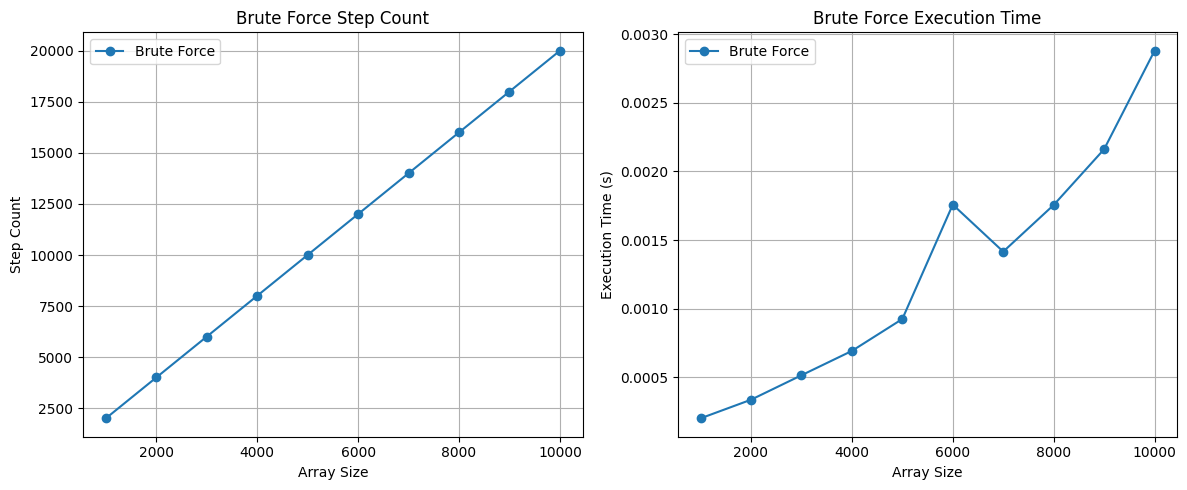

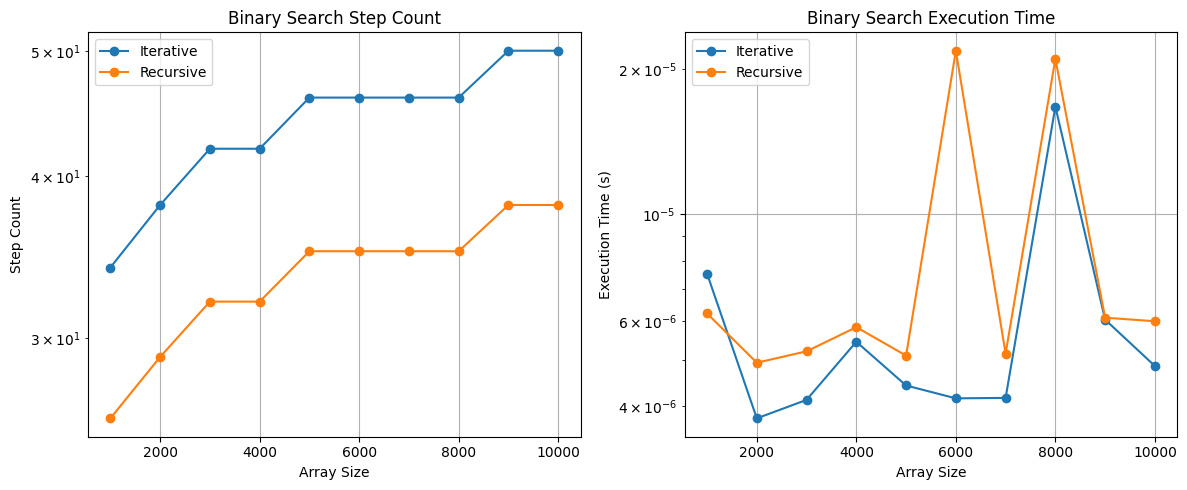

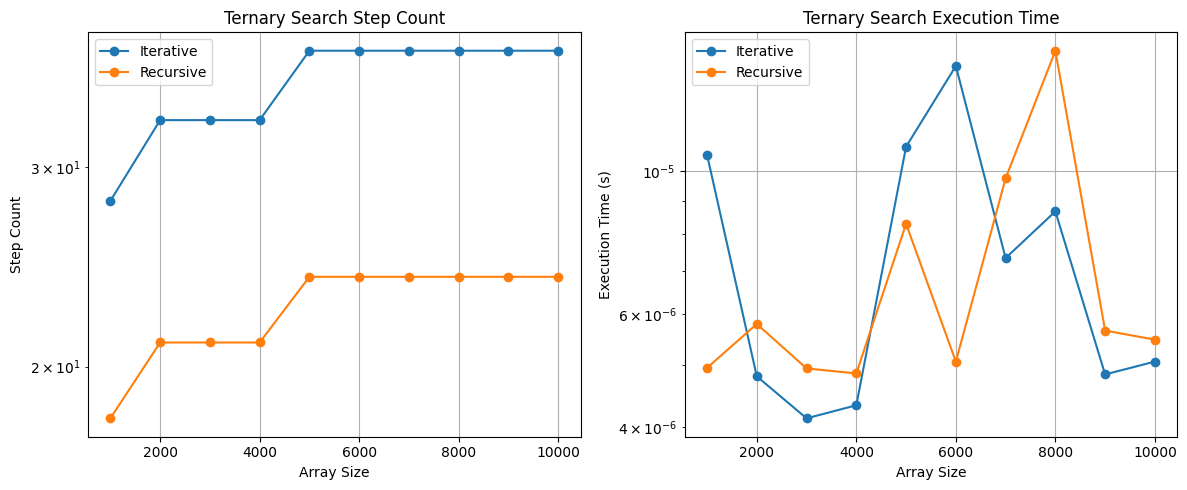

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

# Step counter for the Brute Force Algorithm
def brute_force_search(nums, target):
    steps = 0
    start_index = None
    end_index = None
    count = 0
    for i in range(len(nums)):
        steps += 1  # Iteration step
        steps += 1  # Comparison step
        if nums[i] == target:
            steps += 1  # Found target
            if start_index is None:
                steps += 1  # Assignment
                start_index = i
            steps += 1  # Assignment
            end_index = i
            count += 1
    steps += 1  # Final step before return
    return steps, [start_index, end_index, count] if count > 0 else None

# Step counter for the Iterative Binary Search Algorithm
def iterative_binary_search(nums, target):
    steps = 0
    left, right = 0, len(nums) - 1
    while left <= right:
        steps += 1
        mid = (left + right) // 2
        steps += 1
        if nums[mid] == target:
            return steps, mid
        steps += 1
        if nums[mid] < target:
            steps += 1
            left = mid + 1
        else:
            steps += 1
            right = mid - 1
    steps += 1
    return steps, None

# Step counter for the Recursive Binary Search Algorithm
def recursive_binary_search(nums, target, left=0, right=None, steps=0):
    if right is None:
        right = len(nums) - 1
    steps += 1
    if left > right:
        steps += 1
        return steps, None
    mid = (left + right) // 2
    steps += 1
    if nums[mid] == target:
        return steps, mid
    steps += 1
    if nums[mid] < target:
        return recursive_binary_search(nums, target, mid + 1, right, steps)
    else:
        return recursive_binary_search(nums, target, left, mid - 1, steps)

# Step counter for the Iterative Ternary Search Algorithm
def iterative_ternary_search(nums, target):
    steps = 0
    left, right = 0, len(nums) - 1
    while left <= right:
        steps += 1
        mid1 = left + (right - left) // 3
        mid2 = right - (right - left) // 3
        steps += 2
        if nums[mid1] == target:
            return steps, mid1
        if nums[mid2] == target:
            return steps, mid2
        if target < nums[mid1]:
            steps += 1
            right = mid1 - 1
        elif target > nums[mid2]:
            steps += 1
            left = mid2 + 1
        else:
            steps += 2
            left = mid1 + 1
            right = mid2 - 1
    steps += 1
    return steps, None

# Step counter for the Recursive Ternary Search Algorithm
def recursive_ternary_search(nums, target, left=0, right=None, steps=0):
    if right is None:
        right = len(nums) - 1
    steps += 1
    if left > right:
        steps += 1
        return steps, None
    mid1 = left + (right - left) // 3
    mid2 = right - (right - left) // 3
    steps += 2
    if nums[mid1] == target:
        return steps, mid1
    if nums[mid2] == target:
        return steps, mid2
    if target < nums[mid1]:
        return recursive_ternary_search(nums, target, left, mid1 - 1, steps)
    elif target > nums[mid2]:
        return recursive_ternary_search(nums, target, mid2 + 1, right, steps)
    else:
        return recursive_ternary_search(nums, target, mid1 + 1, mid2 - 1, steps)

# Collect all the step counts and execution times
def analyze_search_algorithms():
    trials = 300
    array_sizes = range(1000, 11000, 1000)
    algorithms = {
        "Brute Force": (brute_force_search, [], []),
        "Binary Search (Iterative)": (iterative_binary_search, [], []),
        "Binary Search (Recursive)": (recursive_binary_search, [], []),
        "Ternary Search (Iterative)": (iterative_ternary_search, [], []),
        "Ternary Search (Recursive)": (recursive_ternary_search, [], []),
    }

    for size in array_sizes:
        nums = list(range(size))
        target = size // 2
        for name, (func, steps_list, times_list) in algorithms.items():
            total_time = 0

            for _ in range(trials):
                start_time = time.perf_counter()
                steps, _ = func(nums, target)
                end_time = time.perf_counter()
                total_time += end_time - start_time

            steps_list.append(steps)
            times_list.append(total_time/trials)

    return array_sizes, algorithms

# Plot graphs separately for clearer scaling visibility + plotting the y-axis using log scaling to compress large values
def plot_algorithm_results():
    array_sizes, algorithms = analyze_search_algorithms()

    # Brute-force Approach plots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].plot(array_sizes, algorithms["Brute Force"][1], marker="o", label="Brute Force")
    axes[0].set_xlabel("Array Size")
    axes[0].set_ylabel("Step Count")
    axes[0].set_title("Brute Force Step Count")
    axes[0].legend()
    axes[0].grid()

    axes[1].plot(array_sizes, algorithms["Brute Force"][2], marker="o", label="Brute Force")
    axes[1].set_xlabel("Array Size")
    axes[1].set_ylabel("Execution Time (s)")
    axes[1].set_title("Brute Force Execution Time")
    axes[1].legend()
    axes[1].grid()

    plt.tight_layout()
    plt.show()


    # Binary search plots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].plot(array_sizes, algorithms["Binary Search (Iterative)"][1], marker="o", label="Iterative")
    axes[0].plot(array_sizes, algorithms["Binary Search (Recursive)"][1], marker="o", label="Recursive")
    axes[0].set_xlabel("Array Size")
    axes[0].set_ylabel("Step Count")
    axes[0].set_title("Binary Search Step Count")
    axes[0].set_yscale("log")
    axes[0].legend()
    axes[0].grid()

    axes[1].plot(array_sizes, algorithms["Binary Search (Iterative)"][2], marker="o", label="Iterative")
    axes[1].plot(array_sizes, algorithms["Binary Search (Recursive)"][2], marker="o", label="Recursive")
    axes[1].set_xlabel("Array Size")
    axes[1].set_ylabel("Execution Time (s)")
    axes[1].set_title("Binary Search Execution Time")
    axes[1].set_yscale("log")
    axes[1].legend()
    axes[1].grid()

    plt.tight_layout()
    plt.show()

    # Ternary search plots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].plot(array_sizes, algorithms["Ternary Search (Iterative)"][1], marker="o", label="Iterative")
    axes[0].plot(array_sizes, algorithms["Ternary Search (Recursive)"][1], marker="o", label="Recursive")
    axes[0].set_xlabel("Array Size")
    axes[0].set_ylabel("Step Count")
    axes[0].set_title("Ternary Search Step Count")
    axes[0].set_yscale("log")
    axes[0].legend()
    axes[0].grid()

    axes[1].plot(array_sizes, algorithms["Ternary Search (Iterative)"][2], marker="o", label="Iterative")
    axes[1].plot(array_sizes, algorithms["Ternary Search (Recursive)"][2], marker="o", label="Recursive")
    axes[1].set_xlabel("Array Size")
    axes[1].set_ylabel("Execution Time (s)")
    axes[1].set_title("Ternary Search Execution Time")
    axes[1].set_yscale("log")
    axes[1].legend()
    axes[1].grid()

    plt.tight_layout()
    plt.savefig("search_algorithms_comparison.png", dpi=300)  # Saves as a single image file
    plt.show()


# Show the plots
plot_algorithm_results()


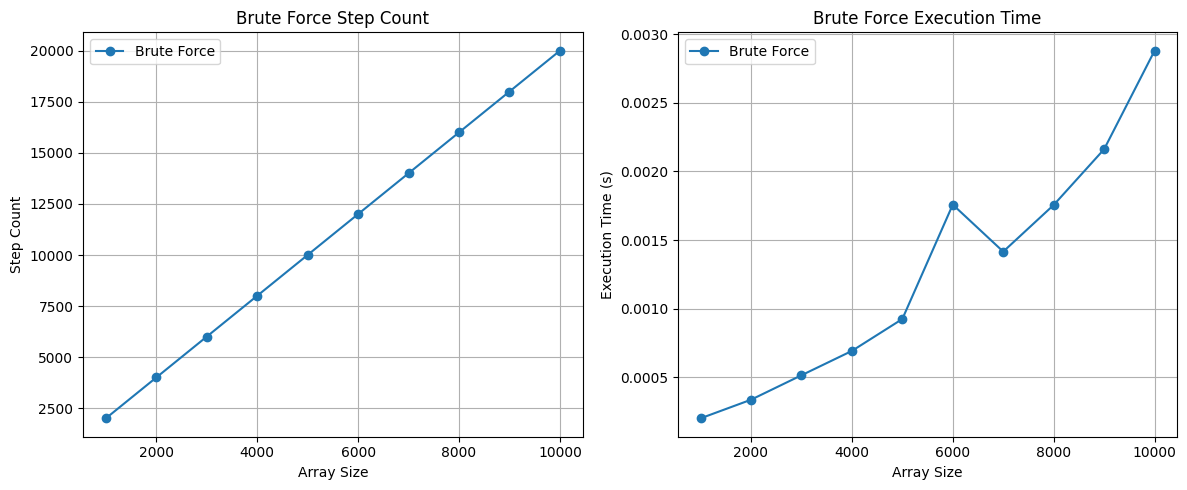

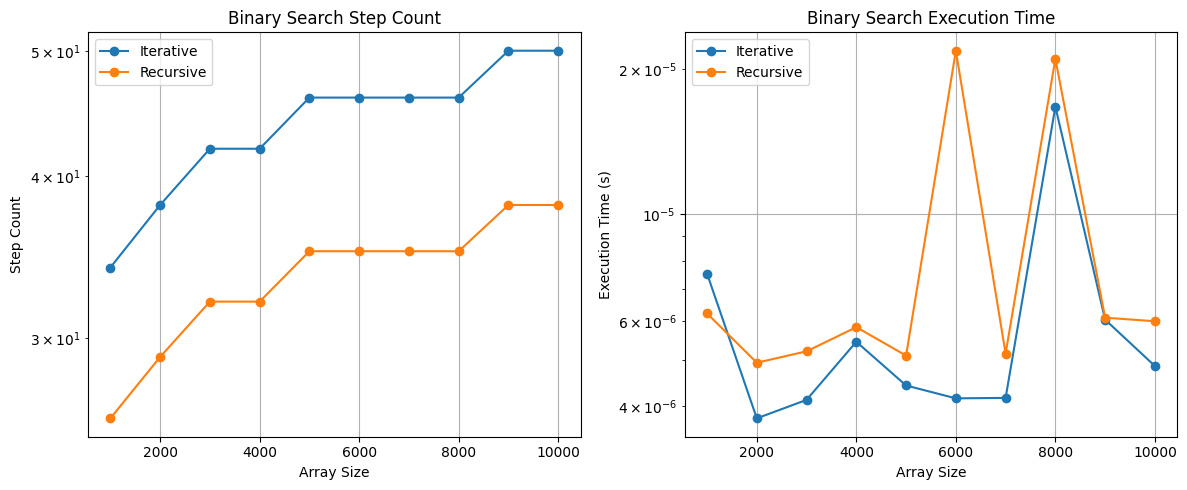

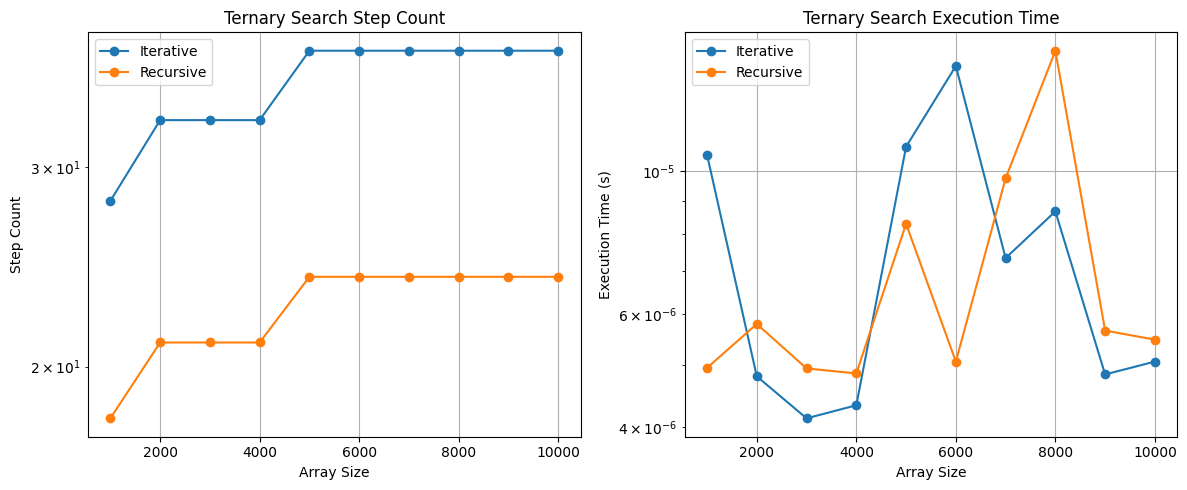

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

# Step counter for the Brute Force Algorithm
def brute_force_search(nums, target):
    steps = 0
    start_index = None
    end_index = None
    count = 0
    for i in range(len(nums)):
        steps += 1  # Iteration step
        steps += 1  # Comparison step
        if nums[i] == target:
            steps += 1  # Found target
            if start_index is None:
                steps += 1  # Assignment
                start_index = i
            steps += 1  # Assignment
            end_index = i
            count += 1
    steps += 1  # Final step before return
    return steps, [start_index, end_index, count] if count > 0 else None

# Step counter for the Iterative Binary Search Algorithm
def iterative_binary_search(nums, target):
    steps = 0
    left, right = 0, len(nums) - 1
    while left <= right:
        steps += 1
        mid = (left + right) // 2
        steps += 1
        if nums[mid] == target:
            return steps, mid
        steps += 1
        if nums[mid] < target:
            steps += 1
            left = mid + 1
        else:
            steps += 1
            right = mid - 1
    steps += 1
    return steps, None

# Step counter for the Recursive Binary Search Algorithm
def recursive_binary_search(nums, target, left=0, right=None, steps=0):
    if right is None:
        right = len(nums) - 1
    steps += 1
    if left > right:
        steps += 1
        return steps, None
    mid = (left + right) // 2
    steps += 1
    if nums[mid] == target:
        return steps, mid
    steps += 1
    if nums[mid] < target:
        return recursive_binary_search(nums, target, mid + 1, right, steps)
    else:
        return recursive_binary_search(nums, target, left, mid - 1, steps)

# Step counter for the Iterative Ternary Search Algorithm
def iterative_ternary_search(nums, target):
    steps = 0
    left, right = 0, len(nums) - 1
    while left <= right:
        steps += 1
        mid1 = left + (right - left) // 3
        mid2 = right - (right - left) // 3
        steps += 2
        if nums[mid1] == target:
            return steps, mid1
        if nums[mid2] == target:
            return steps, mid2
        if target < nums[mid1]:
            steps += 1
            right = mid1 - 1
        elif target > nums[mid2]:
            steps += 1
            left = mid2 + 1
        else:
            steps += 2
            left = mid1 + 1
            right = mid2 - 1
    steps += 1
    return steps, None

# Step counter for the Recursive Ternary Search Algorithm
def recursive_ternary_search(nums, target, left=0, right=None, steps=0):
    if right is None:
        right = len(nums) - 1
    steps += 1
    if left > right:
        steps += 1
        return steps, None
    mid1 = left + (right - left) // 3
    mid2 = right - (right - left) // 3
    steps += 2
    if nums[mid1] == target:
        return steps, mid1
    if nums[mid2] == target:
        return steps, mid2
    if target < nums[mid1]:
        return recursive_ternary_search(nums, target, left, mid1 - 1, steps)
    elif target > nums[mid2]:
        return recursive_ternary_search(nums, target, mid2 + 1, right, steps)
    else:
        return recursive_ternary_search(nums, target, mid1 + 1, mid2 - 1, steps)

# Collect all the step counts and execution times
def analyze_search_algorithms():
    trials = 300
    array_sizes = range(1000, 11000, 1000)
    algorithms = {
        "Brute Force": (brute_force_search, [], []),
        "Binary Search (Iterative)": (iterative_binary_search, [], []),
        "Binary Search (Recursive)": (recursive_binary_search, [], []),
        "Ternary Search (Iterative)": (iterative_ternary_search, [], []),
        "Ternary Search (Recursive)": (recursive_ternary_search, [], []),
    }

    for size in array_sizes:
        nums = list(range(size))
        target = size // 2
        for name, (func, steps_list, times_list) in algorithms.items():
            total_time = 0

            for _ in range(trials):
                start_time = time.perf_counter()
                steps, _ = func(nums, target)
                end_time = time.perf_counter()
                total_time += end_time - start_time

            steps_list.append(steps)
            times_list.append(total_time/trials)

    return array_sizes, algorithms

# Plot graphs separately for clearer scaling visibility + plotting the y-axis using log scaling to compress large values
def plot_algorithm_results():
    array_sizes, algorithms = analyze_search_algorithms()

    # Brute-force Approach plots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].plot(array_sizes, algorithms["Brute Force"][1], marker="o", label="Brute Force")
    axes[0].set_xlabel("Array Size")
    axes[0].set_ylabel("Step Count")
    axes[0].set_title("Brute Force Step Count")
    axes[0].legend()
    axes[0].grid()

    axes[1].plot(array_sizes, algorithms["Brute Force"][2], marker="o", label="Brute Force")
    axes[1].set_xlabel("Array Size")
    axes[1].set_ylabel("Execution Time (s)")
    axes[1].set_title("Brute Force Execution Time")
    axes[1].legend()
    axes[1].grid()

    plt.tight_layout()
    plt.show()


    # Binary search plots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].plot(array_sizes, algorithms["Binary Search (Iterative)"][1], marker="o", label="Iterative")
    axes[0].plot(array_sizes, algorithms["Binary Search (Recursive)"][1], marker="o", label="Recursive")
    axes[0].set_xlabel("Array Size")
    axes[0].set_ylabel("Step Count")
    axes[0].set_title("Binary Search Step Count")
    axes[0].set_yscale("log")
    axes[0].legend()
    axes[0].grid()

    axes[1].plot(array_sizes, algorithms["Binary Search (Iterative)"][2], marker="o", label="Iterative")
    axes[1].plot(array_sizes, algorithms["Binary Search (Recursive)"][2], marker="o", label="Recursive")
    axes[1].set_xlabel("Array Size")
    axes[1].set_ylabel("Execution Time (s)")
    axes[1].set_title("Binary Search Execution Time")
    axes[1].set_yscale("log")
    axes[1].legend()
    axes[1].grid()

    plt.tight_layout()
    plt.show()

    # Ternary search plots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].plot(array_sizes, algorithms["Ternary Search (Iterative)"][1], marker="o", label="Iterative")
    axes[0].plot(array_sizes, algorithms["Ternary Search (Recursive)"][1], marker="o", label="Recursive")
    axes[0].set_xlabel("Array Size")
    axes[0].set_ylabel("Step Count")
    axes[0].set_title("Ternary Search Step Count")
    axes[0].set_yscale("log")
    axes[0].legend()
    axes[0].grid()

    axes[1].plot(array_sizes, algorithms["Ternary Search (Iterative)"][2], marker="o", label="Iterative")
    axes[1].plot(array_sizes, algorithms["Ternary Search (Recursive)"][2], marker="o", label="Recursive")
    axes[1].set_xlabel("Array Size")
    axes[1].set_ylabel("Execution Time (s)")
    axes[1].set_title("Ternary Search Execution Time")
    axes[1].set_yscale("log")
    axes[1].legend()
    axes[1].grid()

    plt.tight_layout()
    plt.savefig("search_algorithms_comparison.png", dpi=300)  # Saves as a single image file
    plt.show()


# Show the plots
plot_algorithm_results()


#### Code for generating plots for the best-case, average-case, and the worst-case performance of all approaches

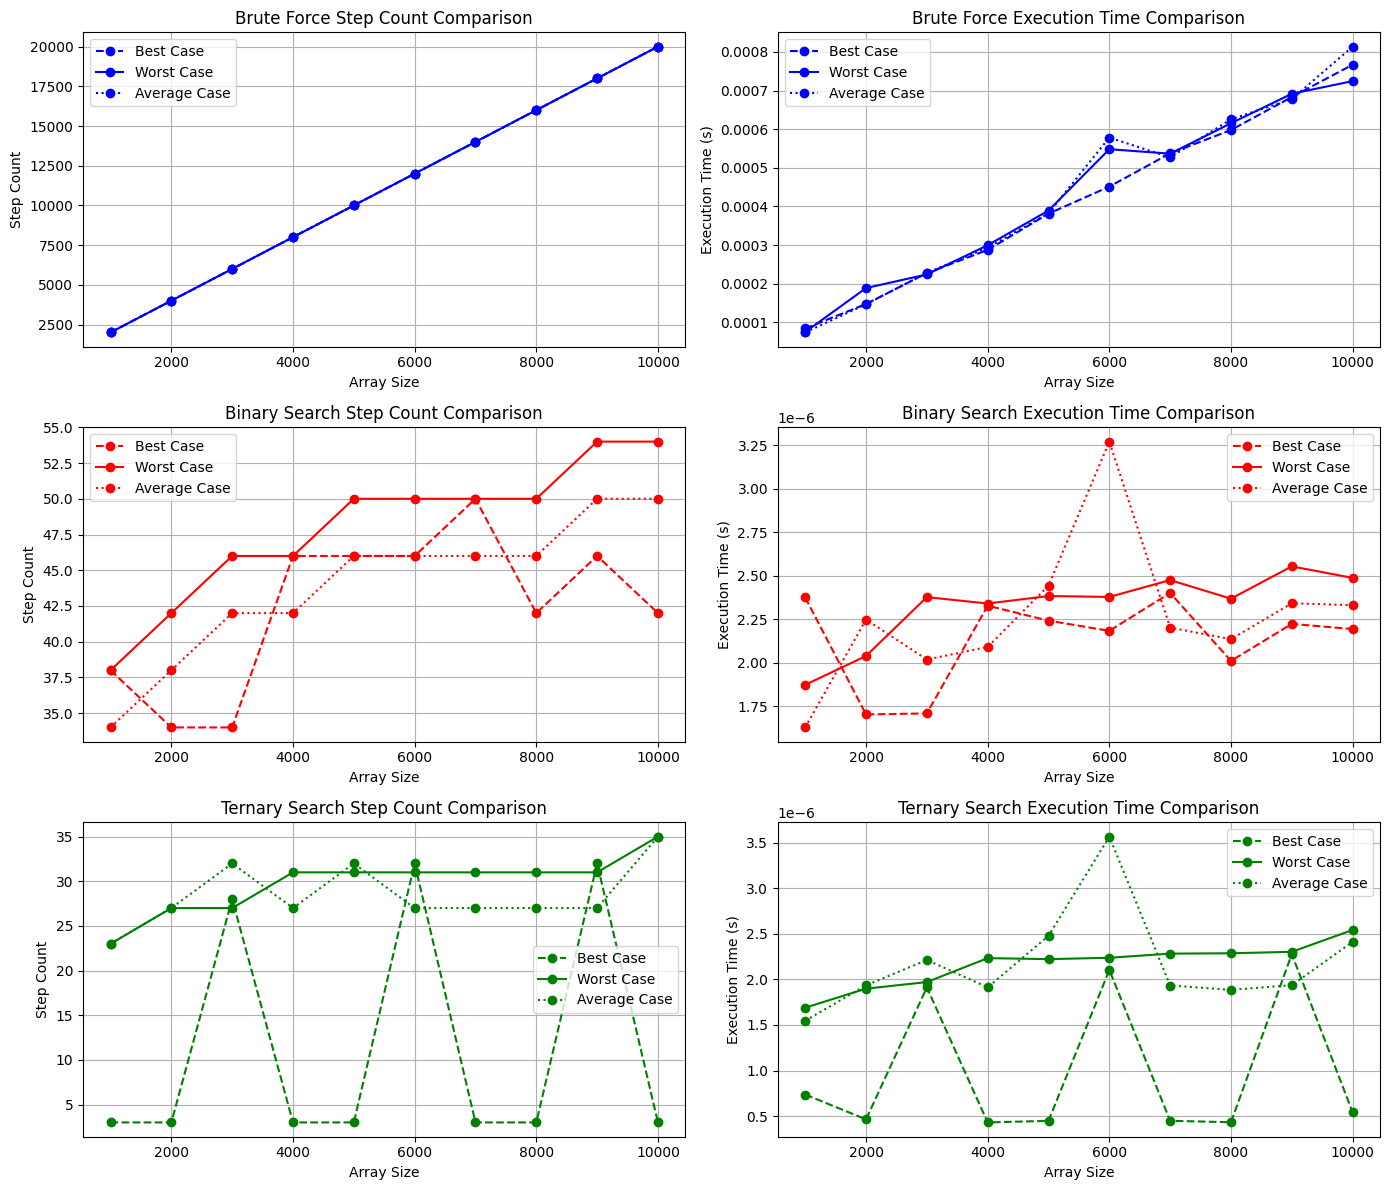

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

def analyze_case_performance():
    trials = 300
    array_sizes = range(1000, 11000, 1000)

    # Dictionary to store cases for each algorithm
    cases = {
        "Best Case": {0: [], 1: [], 2: []},  # [0] - Brute Force, [1] - Binary Search, [2] - Ternary Search
        "Average Case": {0: [], 1: [], 2: []},
        "Worst Case": {0: [], 1: [], 2: []},
    }

    algorithms = {
        0: ("Brute Force", brute_force_search),
        1: ("Binary Search", iterative_binary_search),
        2: ("Ternary Search", iterative_ternary_search),
    }

    for size in array_sizes:
        nums = list(range(size))  # Sorted list

        targets = {
            "Best Case": nums[size // 3],   # When the target is one of the midpoints (perfect for ternary search)
            "Average Case": nums[size // 4],  # The target is a random non-optimal element
            "Worst Case": nums[-1],  # The target is the last element
        }

        for case_type, target in targets.items():
            for idx, (name, func) in algorithms.items():
                total_time = 0
                total_steps = 0

                for _ in range(trials):
                    start_time = time.perf_counter()
                    steps, _ = func(nums, target)
                    end_time = time.perf_counter()
                    total_time += end_time - start_time
                    total_steps += steps

                cases[case_type][idx].append((total_steps // trials, total_time / trials))

    return array_sizes, cases

# Plot function
def plot_case_performance():
    array_sizes, cases = analyze_case_performance()

    labels = ["Brute Force", "Binary Search", "Ternary Search"]
    colors = ["blue", "red", "green"]

    fig, axes = plt.subplots(3, 2, figsize=(14, 12))  # 3 rows (one per algorithm), 2 columns (step count + execution time)

    for idx, label in enumerate(labels):
        # Step Count data
        steps_best = [cases["Best Case"][idx][i][0] for i in range(len(array_sizes))]
        steps_worst = [cases["Worst Case"][idx][i][0] for i in range(len(array_sizes))]
        steps_avg = [cases["Average Case"][idx][i][0] for i in range(len(array_sizes))]

        # Execution Time data
        time_best = [cases["Best Case"][idx][i][1] for i in range(len(array_sizes))]
        time_worst = [cases["Worst Case"][idx][i][1] for i in range(len(array_sizes))]
        time_avg = [cases["Average Case"][idx][i][1] for i in range(len(array_sizes))]

        # Step Count Plot
        axes[idx, 0].plot(array_sizes, steps_best, marker="o", linestyle="dashed", label="Best Case", color=colors[idx])
        axes[idx, 0].plot(array_sizes, steps_worst, marker="o", linestyle="solid", label="Worst Case", color=colors[idx])
        axes[idx, 0].plot(array_sizes, steps_avg, marker="o", linestyle="dotted", label="Average Case", color=colors[idx])
        axes[idx, 0].set_xlabel("Array Size")
        axes[idx, 0].set_ylabel("Step Count")
        axes[idx, 0].set_title(f"{label} Step Count Comparison")
        axes[idx, 0].legend()
        axes[idx, 0].grid()

        # Execution Time Plot
        axes[idx, 1].plot(array_sizes, time_best, marker="o", linestyle="dashed", label="Best Case", color=colors[idx])
        axes[idx, 1].plot(array_sizes, time_worst, marker="o", linestyle="solid", label="Worst Case", color=colors[idx])
        axes[idx, 1].plot(array_sizes, time_avg, marker="o", linestyle="dotted", label="Average Case", color=colors[idx])
        axes[idx, 1].set_xlabel("Array Size")
        axes[idx, 1].set_ylabel("Execution Time (s)")
        axes[idx, 1].set_title(f"{label} Execution Time Comparison")
        axes[idx, 1].legend()
        axes[idx, 1].grid()

    plt.tight_layout()
    plt.show()


plot_case_performance()

#### Code for generating the table with numerical values for all the algorithms in relation to the input sizes

In [ ]:
import pandas as pd

def generate_algorithm_table():
    array_sizes, algorithms = analyze_search_algorithms()

    # Create a DataFrame to store results
    data = {
        "Array Size": array_sizes
    }

    for name, (_, steps_list, times_list) in algorithms.items():
        data[f"{name} Steps"] = steps_list
        data[f"{name} Time (s)"] = times_list

    df = pd.DataFrame(data)

    return df


algorithm_table = generate_algorithm_table()
display(algorithm_table)


,Array Size,Brute Force Steps,Brute Force Time (s),Binary Search (Iterative) Steps,Binary Search (Iterative) Time (s),Binary Search (Recursive) Steps,Binary Search (Recursive) Time (s),Ternary Search (Iterative) Steps,Ternary Search (Iterative) Time (s),Ternary Search (Recursive) Steps,Ternary Search (Recursive) Time (s)
0,1000,2004,0.000073,34,0.000002,26,0.000002,28,0.000002,18,0.000002
1,2000,4004,0.000149,38,0.000002,29,0.000002,33,0.000002,21,0.000002
2,3000,6004,0.000226,42,0.000002,32,0.000002,33,0.000002,21,0.000002
3,4000,8004,0.000294,42,0.000002,32,0.000003,33,0.000002,21,0.000002
4,5000,10004,0.000377,46,0.000002,35,0.000003,38,0.000002,24,0.000003
5,6000,12004,0.000434,46,0.000002,35,0.000003,38,0.000002,24,0.000003
6,7000,14004,0.000538,46,0.000002,35,0.000003,38,0.000003,24,0.000003
7,8000,16004,0.000573,46,0.000002,35,0.000003,38,0.000002,24,0.000003
8,9000,18004,0.000731,50,0.000002,38,0.000003,38,0.000002,24,0.000003
9,10000,20004,0.000721,50,0.000002,38,0.000003,38,0.000002,24,0.000003


We can make assumptions empirically looking at the code and predict how each algorithm would scale given the time complexity to run each command:

1. The brute-force approach iterates through the entire array to find all occurrences of the target.
In the function `brute_force_search(nums, target)`, for each element in nums, we count the following steps:
Iteration Step: `steps += 1` for every element.
Comparison Step: `steps += 1` for checking if the element matches target.
Assignment Steps: updates `start_index`, `end_index`, and `count`, adding at most three steps per match.
Total step count per iteration:
Steps per element $\approx$ 1(iteration) + 1(comparison) + 3(updates if matched), which adds up to $\approx$ $O(n)$ steps per element. Since we iterate over all $n$ elements, the total step count scales linearly with $n$. Therefore, $T(n) = O(n)$ steps per element.
Since the loop runs for every element, the overall step count grows linearly with the size of the array $n$.

2. Binary Search Approach (both iterative & recursive):
In binary search, we repeatedly divide the search space in half at each step.
Each iteration or recursive call performs the following commands:
One midpoint calculation: `(mid = (left + right) // 2` = $O(1)$
One comparison step `if nums[mid] == target` = $O(1)$
One or two pointer updates `left = mid + 1` or `right = mid - 1` = $O(1)$
Each step reduces the search space from $n$ to $n/2$, to $n/4$, to $n/4$, and so on.
The number of iterations (or recursive calls) needed to reduce $n$ to 1 looks like $n, n/2, n/4, n/8, ..., 1$
This sequence is a geometric progression where the number of steps required is: $k = log_2 (n)$
Therefore, the total step count follows: $T(n)=O(logn)$
Since each iteration adds a constant number of steps, binary search has time complexity $O(logn)$

    In `recursive_binary_search(nums, target, left, right, steps)` specifically, the recursion calls itself with a halved search  
    space each time.
    Each recursive call:
    Checks `left > right` (Base Case): `steps += 1`
    Midpoint Calculation: `steps += 1`
    Target Comparison: `steps += 1`
    Recursive Call: calls itself on a reduced search range.
    Since recursion splits the array in half per call, the number of recursive calls follows $O(logn)$
    The number of steps per call is constant, so total steps grow logarithmically.
    Thus, both iterative and recursive binary search have the time complexity of $T(n) = O(logn)$

3. Ternary Search Approach (both iterative and recursive)
Instead of splitting into two parts like binary search, ternary search splits into three.
At each iteration or recursive call:
Two midpoint calculations `mid1` and `mid2` = $O(1)$
Two comparison steps `if nums[mid1] == target` and `if nums[mid2] == target` = $O(1)$
One or two pointer updates adjusting `left` or `right` = $O(1)$
Each step reduces the search space from $n$ to $n/3$ to $n/9$ to $n/27$, and so on
The number of steps required to reduce $n$ to 1 follows the sequence: $n, n/3, n/9, n/27, ..., 1$
Solving for $k = log_3 (n)$
Thus, the total step count follows: $T(n) = O(log_3 (n))$.

##### Numerical confirmation of the time complexities of all the algorithms

To calculate (or approximate) the time complexity for each of these algorithms numerically and therefore see how each algorithm would scale, we will have to calculate the ratio of change in the number of steps (and execution) time and the change in the input size. Since the scale of the plots are large, I generated a table displaying the input size, number of steps, and execution time for each approach for greater preciseness of the results.
The full code for the table can be found in Appendix Part III (D)

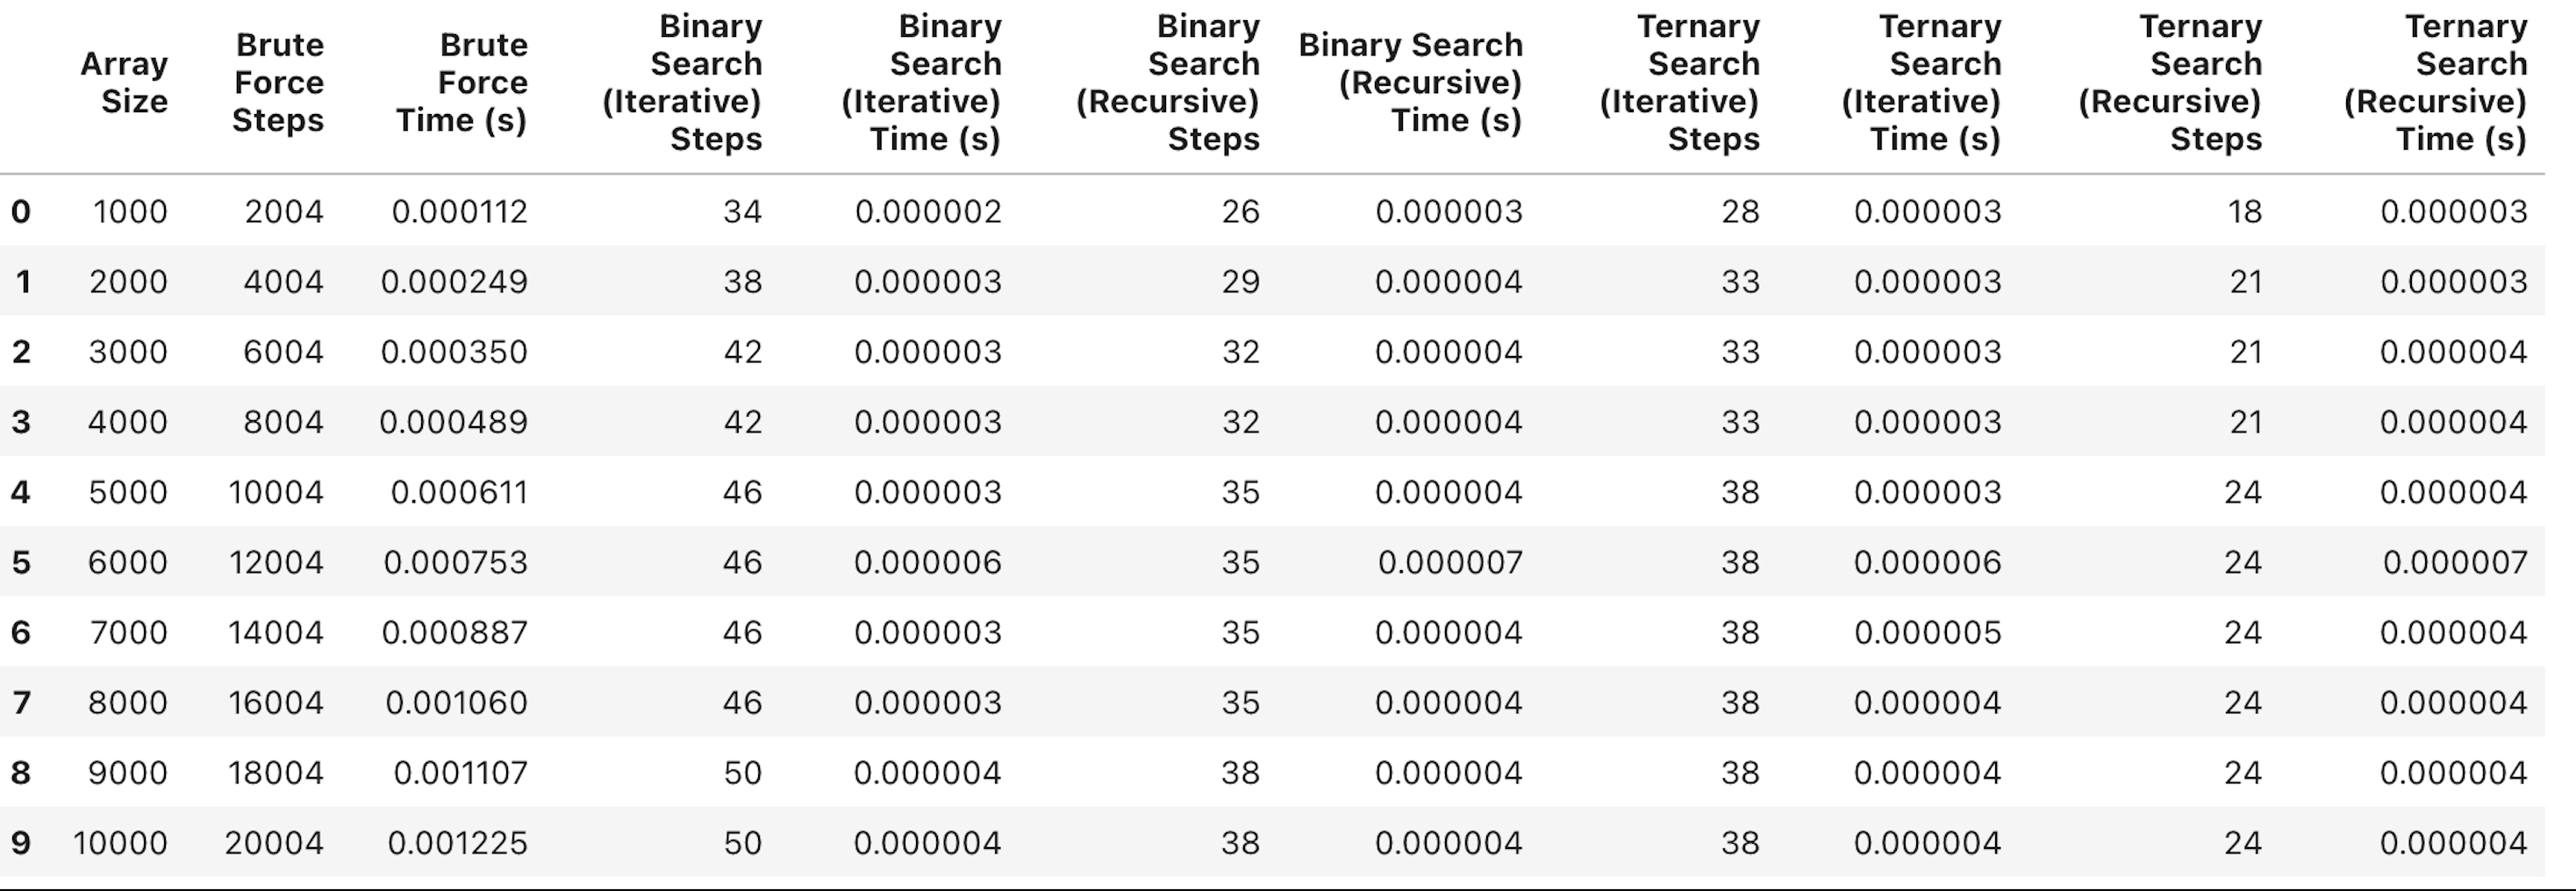

1. For the Brute-Force search, when the input size is 1000, the algorithm takes 2004 steps. As the input size doubles to 2000, the step count increases to 4004 steps, and for 3000 units of input, it reaches 6004 steps. This pattern continues, showing that the number of steps increases at the same rate as the input size, which results in time complexity of $O(n)$ and linear growth.
2. The iterative binary search takes 34 steps for 1000 elements, 38 steps for 2000 elements, and 42 steps for 3000 elements.
We then calculate the ration of these changes:
For input sizes from 1000 to 2000, steps increased from 34 to 38:
change in number of steps: 38/34 = 1.12
change in input size: 2000/1000 = 2
The overall ratio is 1.12/2 = 0.56
When the input size increases from 2000 to 3000 (input size increased by 3000/2000 = 1.5):
steps increase from 38 to 43, therefore the factor of change is 42/38 = 1.11
The overall ratio is 1.11/1.5 = 0.74
These ratios suggest the logarithmic growth and, therefore, logarithmic time complexity, because the expected growth for logarithmic complexity can be defined as following:
If an algorithm follows $O(log n)$ complexity, its step count should be proportional to $T(n) = c \log_2(n)$ for some constant $c$. This means that $\frac{T(n_2)}{T(n_1)} = \frac{c \log_2(n_2)}{c \log_2(n_1)} = \frac{\log_2(n_2)}{\log_2(n_1)}
$
Dividing this by the input size ratio woudl give us $R_{\text{step}} = \frac{\frac{\log_2(n_2)}{\log_2(n_1)}}{\frac{n_2}{n_1}}$
For logarithmic complexity, $ R_{\text{step}} $ should decrease as $ n $ grows because logarithm grows slower than linear functions.
3. Similarly, for the ternary search, we could use execution time to calculate the ratio between the change in execution time as the input size increases:
When the input size goes from 1000 to 6000, the execution time increases from 3 x 10^-5 to 6 x 10^-6. The ratio of change would be: 2/6 = 0.33, which assumes logarithmic growth.

##### Analysis and comparison of all 5 approaches. <br>
The brute-force approach is the least efficient one because it checks each element sequentially. The number of steps of a brute force approach increases linearly with the size of the array, which means that for large arrays, the number of steps would grow significantly. <br>
The binary search approach grows logarithmically with the size of the array, and both iterative and recursive implementations perform similarly in terms of steps. The iterative version has a slight edge due to the absence of function call overhead, but the recursive version is equally effective for this problem. As it was concluded from the metrics analyses, it is the most efficient approach for this problem because it minimizes execution time. <br>
The number of steps for the ternary search approach has a similar logarithmic growth as binary search but with a base of 3 instead of 2. Because we make two comparisons per step instead of one in binary search, this approach would be slightly slower than binary search. An easy example to think about this would be, sorted arrays, in the case of which binary search achieves the same results with fewer operations. As with binary search, the iterative version is insignificantly faster than the recursive version due to reduced overhead. <br>
Therefore, the binary search (either iterative or recursive version) is the best-suited approach for this particular problem set due to the following reasons: <br>
The number of steps in this approach grows very slowly with the size of the array, so it is highly efficient even for large datasets. <br>
Binary search outperforms ternary search in terms of execution time due to fewer comparisons. <br>
It is also easy to implement and debug, particularly in iterative form.